In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

C:\Users\dlali\AppData\Local\Temp\ipykernel_19856\2650430601.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
import pandas as pd
import numpy as np

comments_path = 'ASM_PZ2_podaci_2122/reddit2008/comments_2008_asm/csv-{}.csv'
comments_list = []
for i in range(0, 12):
    comments_list.append(pd.read_csv(comments_path.format(i)))

comments_dtypes = {
    "id": object,
    "author": object,
    "link_id": object,
    "parent_id": object,
    "created_utc": int,
    "subreddit": object,
    "subreddit_id": object,
    "score": int,
    "distinguished": object,
    "gilded": int,
    "controversiality": int
}
#comments_data = comments_data.astype(comments_dtypes)
    
comments_data = pd.concat(comments_list)
comments_list = []
comments_data.reset_index(inplace = True, drop = True)

print(comments_data.shape)

C:\Users\dlali\AppData\Local\Temp\ipykernel_19856\3419464487.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_list.append(pd.read_csv(comments_path.format(i)))
C:\Users\dlali\AppData\Local\Temp\ipykernel_19856\3419464487.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_list.append(pd.read_csv(comments_path.format(i)))


(7242871, 12)


In [5]:
submissions_path = 'ASM_PZ2_podaci_2122/reddit2008/submissions_2008_asm/csv-{}.csv'
submissions_list = []
for i in range(0, 12):
    submissions_list.append(pd.read_csv(submissions_path.format(i)))

submissions_dtypes = {
    "id": object,
    "url": object,
    "permalink": object,
    "author": object,
    "created_utc": int,
    "subreddit": object,
    "subreddit_id": object,
    "num_comments": int,
    "score": int,
    "over_18": bool,
    "distinguished": object,
    "domain": object,
    "stickied": bool,
    "locked": bool,
    "hide_score": bool
}
#submissions_data = submissions_data.astype(submissions_dtypes)
    
submissions_data = pd.concat(submissions_list)
submissions_list = []
submissions_data.reset_index(inplace = True, drop = True)

print(submissions_data.shape)

C:\Users\dlali\AppData\Local\Temp\ipykernel_19856\2766308442.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions_list.append(pd.read_csv(submissions_path.format(i)))
C:\Users\dlali\AppData\Local\Temp\ipykernel_19856\2766308442.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions_list.append(pd.read_csv(submissions_path.format(i)))


(2519853, 16)


# Data Cleansing

In [6]:
print(comments_data['id'].isnull().values.any())
print(comments_data['id'].is_unique)

print(submissions_data['id'].isnull().values.any())
print(submissions_data['id'].is_unique)

comments_null_id = comments_data[comments_data['id'].isnull()]
print("\n", comments_null_id)

print("\n", comments_data.iloc[6422486:6422489, :])

comments_data.loc[comments_data['id'].isnull(), 'id'] = "nan"

print("\nAfter id null fix:\n", comments_data.iloc[6422486:6422489, :])

True
True
False
True

          Unnamed: 0   id     author   link_id parent_id  created_utc  \
6422487       29975  NaN  fuzzybunn  t3_7kef0    t1_k7p   1229661971   

          subreddit subreddit_id  score distinguished  gilded  \
6422487  reddit.com         t5_6      1           NaN       0   

         controversiality  
6422487                 0  

          Unnamed: 0   id     author   link_id   parent_id  created_utc  \
6422486       29974  nam    ithkuil  t3_7kg1c    t3_7kg1c   1229661962   
6422487       29975  NaN  fuzzybunn  t3_7kef0      t1_k7p   1229661971   
6422488       29976  nao  [deleted]  t3_77mga  t1_c05wklq   1229661974   

          subreddit subreddit_id  score distinguished  gilded  \
6422486   AskReddit     t5_2qh1i     -5           NaN       0   
6422487  reddit.com         t5_6      1           NaN       0   
6422488       astro     t5_2qh2j      1           NaN       0   

         controversiality  
6422486                 0  
6422487                 0  
6

In [7]:
# Unnamed column COMMENTS
print(comments_data.columns)
print(comments_data["Unnamed: 0"])

comments_data = comments_data.drop(columns=["Unnamed: 0"])

print("\n", comments_data.columns)

# Unnamed column SUBMISSIONS
print("\n", submissions_data.columns)
print(submissions_data["Unnamed: 0"])

submissions_data = submissions_data.drop(columns=["Unnamed: 0"])

print("\n", submissions_data.columns)

Index(['Unnamed: 0', 'id', 'author', 'link_id', 'parent_id', 'created_utc',
       'subreddit', 'subreddit_id', 'score', 'distinguished', 'gilded',
       'controversiality'],
      dtype='object')
0               0
1               1
2               2
3               3
4               4
            ...  
7242866    850354
7242867    850355
7242868    850356
7242869    850357
7242870    850358
Name: Unnamed: 0, Length: 7242871, dtype: int64

 Index(['id', 'author', 'link_id', 'parent_id', 'created_utc', 'subreddit',
       'subreddit_id', 'score', 'distinguished', 'gilded', 'controversiality'],
      dtype='object')

 Index(['Unnamed: 0', 'id', 'url', 'permalink', 'author', 'created_utc',
       'subreddit', 'subreddit_id', 'num_comments', 'score', 'over_18',
       'distinguished', 'domain', 'stickied', 'locked', 'hide_score'],
      dtype='object')
0               0
1               1
2               2
3               3
4               4
            ...  
2519848    283910
2519849    2

In [8]:
comments_contr_not_zero = comments_data[comments_data['controversiality'] != 0]
print("\n", comments_contr_not_zero)


               id     author   link_id   parent_id  created_utc      subreddit  \
3089851  c04mkk2  [deleted]  t3_6qua7  t1_c04mjzq   1215557409  entertainment   
7241967  c06vw3y   nonworse  t3_7k6n5  t1_c06vprb   1229577135      worldnews   

        subreddit_id  score distinguished  gilded  controversiality  
3089851     t5_2qh0f      0           NaN       0                 1  
7241967     t5_2qh13      3           NaN       0                 1  


In [9]:
# check for null columns - COMMENTS
nan_values = comments_data.isna()
nan_columns = nan_values.any()
columns_with_nan = comments_data.columns[nan_columns].tolist()
print(columns_with_nan)

['distinguished']


In [10]:
comments_dis_not_null = comments_data[comments_data['distinguished'].isnull() == False]
print("\n", comments_dis_not_null.shape)


 (5, 11)


In [11]:
# check for null columns - SUBMISSIONS
nan_values = submissions_data.isna()
nan_columns = nan_values.any()
columns_with_nan = submissions_data.columns[nan_columns].tolist()
print(columns_with_nan)

['distinguished', 'domain']


In [12]:
submissions_dis_not_null = submissions_data[submissions_data['distinguished'].isnull() == False]
print("\n", submissions_dis_not_null.shape)

submissions_domain_not_null = submissions_data[submissions_data['domain'].isnull() == True]
print("\n", submissions_domain_not_null.shape)
#print("\n", submissions_domain_not_null)


 (5, 15)

 (6, 15)


In [13]:
# Data types check
print(comments_data.dtypes, "\n")
print(submissions_data.dtypes)

id                  object
author              object
link_id             object
parent_id           object
created_utc          int64
subreddit           object
subreddit_id        object
score                int64
distinguished       object
gilded               int64
controversiality     int64
dtype: object 

id               object
url              object
permalink        object
author           object
created_utc       int64
subreddit        object
subreddit_id     object
num_comments      int64
score             int64
over_18            bool
distinguished    object
domain           object
stickied           bool
locked             bool
hide_score         bool
dtype: object


# Statistička obrada podataka (3.4.1.)

In [14]:

# 1) Koliko postoji različitih sabredita koji se pojavljuju u posmatranom periodu? Koji su najvažniji po broju korisnika, a koji po broju komentara? 

submissions_subreddit_columns = submissions_data.loc[:,'subreddit' : 'subreddit_id']
submissions_subreddit_columns = submissions_subreddit_columns.drop_duplicates()
print("SUBMISSIONS Subreddits:\n", submissions_subreddit_columns.shape, "\n")

comments_subreddit_columns = comments_data.loc[:, 'subreddit' : 'subreddit_id']
comments_subreddit_columns = comments_subreddit_columns.drop_duplicates()
print("COMMENTS Subreddits:\n", comments_subreddit_columns.shape, "\n")

subreddit_columns = pd.concat([submissions_subreddit_columns, comments_subreddit_columns])
print("ALL Subreddits:\n", subreddit_columns.shape, "\n")

subreddit_columns = subreddit_columns.drop_duplicates()
print("UNIQUE Subreddit pairs:\n", subreddit_columns.shape, "\n")

#---------------------------------------------------------------------------------------------

# check for nonuniqueness (subreddits, subreddit IDs)
print("\nCHECK FOR NONUNIQUENESS\n")
print("submissions_data subreddit_id - is unique: ", submissions_subreddit_columns['subreddit_id'].is_unique)
print("comments_data subreddit_id - is unique: ", comments_subreddit_columns['subreddit_id'].is_unique)
print("Column subreddit - is unique: ", subreddit_columns['subreddit'].is_unique)
print("Column subreddit_id - is unique: ", subreddit_columns['subreddit_id'].is_unique, "\n")

data_grouped = subreddit_columns[['subreddit', 'subreddit_id']].groupby('subreddit_id')

data_aggregated = data_grouped['subreddit_id'].agg(np.size)
#print(data_aggregated, "\n")

data_nonunique = data_aggregated[data_aggregated > 1]
print(data_nonunique, "\n")

target_match_list = data_nonunique.keys()[:]
#print("Nonunique IDs:", target_match_list, "\n")

data_target = subreddit_columns[subreddit_columns['subreddit_id'].isin(target_match_list)]
print(data_target, "\n")

print("COMMENTS data rows with target_match IDs:\n")
comments_target_rows = comments_data[comments_data['subreddit_id'].isin(target_match_list)]
comments_target_rows = comments_target_rows.drop_duplicates('subreddit_id')
print(comments_target_rows, "\n")

print("SUBMISSIONS data rows with target_match IDs:\n")
submissions_target_rows = submissions_data[submissions_data['subreddit_id'].isin(target_match_list)]
submissions_target_rows = submissions_target_rows.drop_duplicates('subreddit_id')
print(submissions_target_rows)


SUBMISSIONS Subreddits:
 (4968, 2) 

COMMENTS Subreddits:
 (2695, 2) 

ALL Subreddits:
 (7663, 2) 

UNIQUE Subreddit pairs:
 (5034, 2) 


CHECK FOR NONUNIQUENESS

submissions_data subreddit_id - is unique:  True
comments_data subreddit_id - is unique:  True
Column subreddit - is unique:  False
Column subreddit_id - is unique:  False 

subreddit_id
t5_2qhyl    2
t5_2qj0s    2
Name: subreddit_id, dtype: int64 

            subreddit subreddit_id
916759       _Descary     t5_2qj0s
2003769  __Journalism     t5_2qhyl
2719859       Descary     t5_2qj0s
5721529    Journalism     t5_2qhyl 

COMMENTS data rows with target_match IDs:

              id     author   link_id parent_id  created_utc   subreddit  \
2719859  c04emsf  [deleted]  t3_6o2b4  t3_6o2b4   1213881938     Descary   
5721529  c0672mk      nopal  t3_7bhv5  t3_7bhv5   1225888381  Journalism   

        subreddit_id  score distinguished  gilded  controversiality  
2719859     t5_2qj0s      1           NaN       0                 0 

In [15]:
print("Before:\n", subreddit_columns, "\n")
unique_subreddits_1 = subreddit_columns[~((subreddit_columns['subreddit'] == '_Descary') & (subreddit_columns['subreddit_id'] == 't5_2qj0s'))]
unique_subreddits = unique_subreddits_1[~((unique_subreddits_1['subreddit'] == '__Journalism') & (unique_subreddits_1['subreddit_id'] == 't5_2qhyl'))]
print("After:\n", unique_subreddits)

# Q: Koliko postoji različitih sabredita koji se pojavljuju u posmatranom periodu? 
# ANSWER: 5032

# Changing subreddit (with same IDs) names from _Name to Name ##### TREBALO BI PROMENITI I permalink
submissions_data.loc[submissions_data['subreddit_id'] == 't5_2qj0s', 'subreddit'] = 'Descary'
submissions_data.loc[submissions_data['subreddit_id'] == 't5_2qhyl', 'subreddit'] = 'Journalism'

submissions_rows = submissions_data[submissions_data['subreddit_id'].isin(target_match_list)]
submissions_rows = submissions_rows.drop_duplicates('subreddit_id')
print(submissions_rows)

Before:
               subreddit subreddit_id
0            reddit.com         t5_6
1               science      t5_mouw
2           programming      t5_2fwo
4              politics     t5_2cneq
14                   ja      t5_22i6
...                 ...          ...
6621110         Gingers     t5_2qqhd
6740095    kultur_sanat     t5_2qmtd
6777509          Riddle     t5_2qpb6
7029905             com     t5_2qpqb
7171025  JailbaitPhotos     t5_2qplw

[5034 rows x 2 columns] 

After:
               subreddit subreddit_id
0            reddit.com         t5_6
1               science      t5_mouw
2           programming      t5_2fwo
4              politics     t5_2cneq
14                   ja      t5_22i6
...                 ...          ...
6621110         Gingers     t5_2qqhd
6740095    kultur_sanat     t5_2qmtd
6777509          Riddle     t5_2qpb6
7029905             com     t5_2qpqb
7171025  JailbaitPhotos     t5_2qplw

[5032 rows x 2 columns]
            id                             

In [16]:
print("SUBREDDIT WITH MAX NUMBER OF COMMENTS:\n")
submissions_num_comments = submissions_data.groupby(["subreddit","subreddit_id"]).num_comments.sum().reset_index()
print("Subreddits num_comments:\n", submissions_num_comments, "\n")

max_num_comments = submissions_num_comments['num_comments'].idxmax()
max_num_comments_row = submissions_num_comments.iloc[max_num_comments]
print("Subreddits with MAX num of comments:\n", max_num_comments_row, "\n")

max_num_comments_10_rows = submissions_num_comments.nlargest(10, 'num_comments')
print("First 10 subreddits with MAX num of comments:\n", max_num_comments_10_rows, "\n")

# Q: Koji su najvažniji po broju korisnika, a koji po broju komentara?
# A: Po broju komentara: reddit.com (1768764), politics(1059618), programming(421137), ...


SUBREDDIT WITH MAX NUMBER OF COMMENTS:

Subreddits num_comments:
                subreddit subreddit_id  num_comments
0        10stepstohealth     t5_2qkc6             1
1                1111111     t5_2qmqz             1
2                   1337     t5_2qmjz             8
3     1_Irritated_Mother     t5_2qq2z             1
4                 1keral     t5_2qqj4             2
...                  ...          ...           ...
4963            zoepster     t5_2qkks             1
4964             zombies     t5_2qi0e           349
4965                zope     t5_2qo2s             1
4966                zora     t5_2qhnl             5
4967               zubii     t5_2ql58             0

[4968 rows x 3 columns] 

Subreddits with MAX num of comments:
 subreddit       reddit.com
subreddit_id          t5_6
num_comments       1768764
Name: 4154, dtype: object 

First 10 subreddits with MAX num of comments:
         subreddit subreddit_id  num_comments
4154   reddit.com         t5_6       1768764

In [17]:
print("SUBREDDIT WITH MAX NUMBER OF USERS:\n")
submissions_authors = submissions_data[['subreddit', 'subreddit_id', 'author']]
print("Subreddits authors:\n", submissions_authors, "\n")

submissions_authors_unique = submissions_authors.drop_duplicates()
print("Subreddits authors without duplicates:\n", submissions_authors_unique, "\n")

submissions_num_authors = submissions_authors_unique.groupby(["subreddit","subreddit_id"]).author.count().reset_index()
print("Subreddit num_authors:\n", submissions_num_authors, "\n")

max_num_authors = submissions_num_authors['author'].idxmax()
max_num_authors_row = submissions_num_authors.iloc[max_num_authors]
print("Subreddits with MAX num of authors:\n", max_num_authors_row, "\n")

max_num_authors_10_rows = submissions_num_authors.nlargest(5, 'author')
print("First 10 subreddits with MAX num of authors:\n", max_num_authors_10_rows, "\n")

# sta raditi sa celijama gde je author==[deleted] ??

# Q: Koji  su najvažniji po broju korisnika, a koji po broju komentara?
# A: Po broju korisnika: reddit.com (138153), politics(15250), business(13009), ...

SUBREDDIT WITH MAX NUMBER OF USERS:

Subreddits authors:
            subreddit subreddit_id     author
0         reddit.com         t5_6      DITUS
1            science      t5_mouw     rmuser
2        programming      t5_2fwo  [deleted]
3         reddit.com         t5_6      zorno
4           politics     t5_2cneq     rmuser
...              ...          ...        ...
2519848     politics     t5_2cneq   middkidd
2519849          ass     t5_2qoil  [deleted]
2519850         nsfw       t5_vf2  [deleted]
2519851       gaming     t5_2qh03  [deleted]
2519852   reddit.com         t5_6     klippa

[2519853 rows x 3 columns] 

Subreddits authors without duplicates:
            subreddit subreddit_id            author
0         reddit.com         t5_6             DITUS
1            science      t5_mouw            rmuser
2        programming      t5_2fwo         [deleted]
3         reddit.com         t5_6             zorno
4           politics     t5_2cneq            rmuser
...              ...

In [18]:
# 2) Kakav je prosečan broj zabeleženih korisnika aktivnih u posmatranom periodu po sabreditu? 
# Korisnik se smatra aktivnim na sabreditu ako je zabeležen barem jedan komentar ili objava tog korisnika.

print("AUTHORS PER SUBMISSION:\n")
submissions_authors = submissions_data[['subreddit', 'subreddit_id', 'author']]
print("Submissions authors:\n", submissions_authors, "\n")

submissions_authors_unique = submissions_authors.drop_duplicates()
print("Submissions authors without duplicates:\n", submissions_authors_unique, "\n")

print("AUTHORS PER COMMENT:\n")
comments_authors = comments_data[['subreddit', 'subreddit_id', 'author']]
print("Comments authors:\n", comments_authors, "\n")

comments_authors_unique = comments_authors.drop_duplicates()
print("Comments authors without duplicates:\n", comments_authors_unique, "\n")

print("AUTHORS PER COMMENT AND PER SUBMISSION:")
subreddit_authors = pd.concat([comments_authors_unique, submissions_authors_unique])
print(subreddit_authors.shape, "\n")

subreddit_authors_unique = subreddit_authors.drop_duplicates()
print("Subreddit authors without duplicates:\n", subreddit_authors_unique, "\n")

subreddit_num_authors = subreddit_authors_unique.groupby(["subreddit","subreddit_id"]).author.count().reset_index()
print("Subreddit num_authors:\n", subreddit_num_authors, "\n")

subreddit_sum_authors = subreddit_num_authors['author'].sum()
subreddit_authors_num_rows = subreddit_num_authors.shape[0]
subreddit_authors_avg = round(subreddit_sum_authors/subreddit_authors_num_rows)
print("Average number of authors per subreddit:\n", subreddit_authors_avg)

# Q: Kakav je prosečan broj zabeleženih korisnika aktivnih u posmatranom periodu po sabreditu?
# A: 129

AUTHORS PER SUBMISSION:

Submissions authors:
            subreddit subreddit_id     author
0         reddit.com         t5_6      DITUS
1            science      t5_mouw     rmuser
2        programming      t5_2fwo  [deleted]
3         reddit.com         t5_6      zorno
4           politics     t5_2cneq     rmuser
...              ...          ...        ...
2519848     politics     t5_2cneq   middkidd
2519849          ass     t5_2qoil  [deleted]
2519850         nsfw       t5_vf2  [deleted]
2519851       gaming     t5_2qh03  [deleted]
2519852   reddit.com         t5_6     klippa

[2519853 rows x 3 columns] 

Submissions authors without duplicates:
            subreddit subreddit_id            author
0         reddit.com         t5_6             DITUS
1            science      t5_mouw            rmuser
2        programming      t5_2fwo         [deleted]
3         reddit.com         t5_6             zorno
4           politics     t5_2cneq            rmuser
...              ...          

In [19]:
# 3) Ko su korisnici sa najvećim brojem objava, a ko korisnici sa najvećim brojem komentara? 

print("MAX SUBMISSIONS USERS:\n")
max_submissions_users = submissions_data.author.value_counts()[:6]
print("With deleted:\n", max_submissions_users)
max_submissions_users_not_del = max_submissions_users.tail(max_submissions_users.shape[0] - 1)
print("\nUsers with max_submissions:\n", max_submissions_users_not_del)

# Q: Ko su korisnici sa najvećim brojem objava, a ko korisnici sa najvećim brojem komentara? 
# A: Korisnici sa najvećim brojem objava: gst(18870), qgyh2(12238), ...

print("\nMAX COMMENTS USERS:\n")
max_comments_users = comments_data.author.value_counts()[:6]
print("With deleted:\n", max_comments_users)
max_comments_users_not_del = max_comments_users.tail(max_comments_users.shape[0] - 1)
print("\nUsers with max_comments:\n", max_comments_users_not_del)

# Q: Ko su korisnici sa najvećim brojem objava, a ko korisnici sa najvećim brojem komentara? 
# A: Korisnici sa najvećim brojem komentara: NoMoreNicksLeft(13480), malcontent(12159), ...

MAX SUBMISSIONS USERS:

With deleted:
 [deleted]           475043
gst                  18870
qgyh2                12238
rmuser                9822
twolf1                8597
IAmperfectlyCalm      8308
Name: author, dtype: int64

Users with max_submissions:
 gst                 18870
qgyh2               12238
rmuser               9822
twolf1               8597
IAmperfectlyCalm     8308
Name: author, dtype: int64

MAX COMMENTS USERS:

With deleted:
 [deleted]          2369181
NoMoreNicksLeft      13480
malcontent           12159
matts2               11672
mexicodoug            9169
7oby                  9161
Name: author, dtype: int64

Users with max_comments:
 NoMoreNicksLeft    13480
malcontent         12159
matts2             11672
mexicodoug          9169
7oby                9161
Name: author, dtype: int64


In [20]:
# 4) Koji korisnici su aktivni na najvećem broju sabredita? Na koliko su sabredita aktivni?

print("SUBMISSION AUTHORS PER SUBREDDIT:\n")
submissions_authors_4 = submissions_data[['subreddit', 'subreddit_id', 'author']]
print("Submissions authors:\n", submissions_authors_4.shape, "\n")

submissions_authors_unique_4 = submissions_authors_4.drop_duplicates()
print("Submissions authors without duplicates:\n", submissions_authors_unique_4, "\n")

print("COMMENT AUTHORS PER SUBREDDIT:\n")
comments_authors_4 = comments_data[['subreddit', 'subreddit_id', 'author']]
print("Comments authors:\n", comments_authors_4.shape, "\n")

comments_authors_unique_4 = comments_authors_4.drop_duplicates()
print("Comments authors without duplicates:\n", comments_authors_unique_4, "\n")

print("COMMENT AND SUBMISSION AUTHORS PER SUBREDDIT:")
subreddit_authors_4 = pd.concat([comments_authors_unique_4, submissions_authors_unique_4])
print(subreddit_authors_4.shape, "\n")

print("MAX SUBREDDIT USERS:\n")
max_subreddit_users_4 = subreddit_authors_4.author.value_counts()[:6]
print("With deleted:\n", max_subreddit_users_4, "\n")
max_subreddit_users_not_del_4 = max_subreddit_users_4.tail(max_subreddit_users_4.shape[0] - 1)
print("Users active on max_subreddits:\n", max_subreddit_users_not_del_4)

# Q: Koji korisnici su aktivni na najvećem broju sabredita? Na koliko su sabredita aktivni?
# A: MrKlaatu(181), Escafane(154), ...

SUBMISSION AUTHORS PER SUBREDDIT:

Submissions authors:
 (2519853, 3) 

Submissions authors without duplicates:
            subreddit subreddit_id            author
0         reddit.com         t5_6             DITUS
1            science      t5_mouw            rmuser
2        programming      t5_2fwo         [deleted]
3         reddit.com         t5_6             zorno
4           politics     t5_2cneq            rmuser
...              ...          ...               ...
2519835   reddit.com         t5_6          edlive96
2519836   reddit.com         t5_6  TrendyBrandyKids
2519840     politics     t5_2cneq      ohstrangeone
2519844        funny     t5_2qh33   themightymidget
2519852   reddit.com         t5_6            klippa

[320123 rows x 3 columns] 

COMMENT AUTHORS PER SUBREDDIT:

Comments authors:
 (7242871, 3) 

Comments authors without duplicates:
           subreddit subreddit_id               author
0        reddit.com         t5_6                Haven
1        reddit.com   

MAX SUBMISSIONS USERS:

With deleted:
                   author  sub_count
1                    gst      18870
2                  qgyh2      12238
3                 rmuser       9822
4                 twolf1       8597
5       IAmperfectlyCalm       8308
...                  ...        ...
185347           azulina          1
185348           1quawii          1
185349       mobilesuite          1
185350            botboy          1
185351            klippa          1

[185351 rows x 2 columns]

MAX COMMENTS USERS:

With deleted:
                 author  com_count
1      NoMoreNicksLeft      13480
2           malcontent      12159
3               matts2      11672
4           mexicodoug       9169
5                 7oby       9161
...                ...        ...
88565           trybaj          1
88566     Computamatic          1
88567              jwg          1
88568          ten4dan          1
88569            yentz          1

[88569 rows x 2 columns]
                  author  sub_c

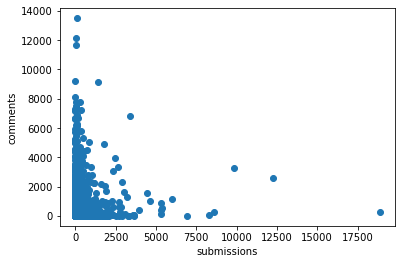

Pearson correlation coefficient: 0.14608000759904788


In [24]:
# 5) Kako su korelisani brojevi objava i brojevi komentara korisnika? Odrediti Pirsonov koeficijent korelacije i izvršiti vizuelizaciju.
import scipy.stats as sc
from matplotlib import pyplot as plt

print("MAX SUBMISSIONS USERS:\n")
max_submissions_users = submissions_data.author.value_counts().reset_index()
max_submissions_users.columns = ['author', 'sub_count']
max_submissions_users = max_submissions_users[max_submissions_users['author'] != '[deleted]']
print("With deleted:\n", max_submissions_users)

print("\nMAX COMMENTS USERS:\n")
max_comments_users = comments_data.author.value_counts().reset_index()
max_comments_users.columns = ['author', 'com_count']
max_comments_users = max_comments_users[max_comments_users['author'] != '[deleted]']
print("With deleted:\n", max_comments_users)

# from pathlib import Path  
# filepath = Path('out.csv')
# corell.to_csv(filepath)

corell = pd.merge(max_submissions_users, max_comments_users, how="outer", on="author")
corell = corell.fillna(0)

corell_dtypes = {
    "sub_count": int,
    "author": object,
    "com_count": int
}
corell = corell.astype(corell_dtypes)
print(corell)

x = corell['sub_count'].to_list()
y = corell['com_count'].to_list()

plt.plot(x, y, 'o')
plt.xlabel("submissions")
plt.ylabel("comments")
plt.show()

p_coeff = sc.pearsonr(x, y)
print('Pearson correlation coefficient:', p_coeff[0])

In [25]:
# 6) Koje objave poseduju najveći broj komentara i na kojim su sabreditima postavljene? 
# Prikazati podatke o tim objavama, uključujući to na kojem su sabreditu postavljene 
# i šta im je sadržaj (ako je polje objave “over 18” postavljeno na false).

submissions_sorted_num_comments = submissions_data.sort_values(by='num_comments', ascending=False)
# submissions_sorted_num_comments = submissions_sorted_num_comments[submissions_sorted_num_comments['over_18'] == False]

submissions_sorted_num_comments_first10 = submissions_sorted_num_comments[:10] 
print("First 10 submissions sorted by number of comments:\n", submissions_sorted_num_comments_first10, "\n")

# Q: Koje objave poseduju najveći broj komentara i na kojim su sabreditima postavljene? 
# A: submission_id(subreddit, num_comments) = 6nz1k(science, 33329), 78n1v(WTF, 3657), ...

urls = submissions_sorted_num_comments_first10['url'].to_list()
print(urls)

First 10 submissions sorted by number of comments:
             id                                                url  \
914332   6nz1k                          http://hundredpushups.com   
1871724  78n1v  http://www.time.com/time/nation/article/0,8599...   
2427328  7kpe5  https://www.reddit.com/r/AskReddit/comments/7k...   
135995   675oj  https://www.reddit.com/r/reddit.com/comments/6...   
1999653  7beo2  https://www.reddit.com/r/politics/comments/7be...   
699049   6jbc0  https://www.reddit.com/r/reddit.com/comments/6...   
1295906  6w7e6  https://www.reddit.com/r/reddit.com/comments/6...   
1409047  6yn6t                   http://www.cnbc.com/id/26454655?   
2005354  7bj3f  http://www.latimes.com/news/local/la-me-gaymar...   
2082790  7d7jm  https://www.reddit.com/r/reddit.com/comments/7...   

                                                 permalink        author  \
914332   /r/science/comments/6nz1k/got_six_weeks_try_th...         zekel   
1871724  /r/WTF/comments/78n1v/a_bla

### Modelovanje mreže

In [26]:
import networkx as nx

In [27]:
G = nx.Graph()
G.add_nodes_from(set(unique_subreddits['subreddit_id']))

In [28]:
sub_subreddit_id_author = submissions_data[['subreddit_id', 'author']]
com_subreddit_id_author = comments_data[['subreddit_id', 'author']]

print("Listing subreddits and authors:\n")
print(sub_subreddit_id_author, '\n')
print(com_subreddit_id_author, '\n')

sub_subreddit_id_author = sub_subreddit_id_author[sub_subreddit_id_author['author'] != '[deleted]']
com_subreddit_id_author = com_subreddit_id_author[com_subreddit_id_author['author'] != '[deleted]']

print("After removed '[deleted]':\n")
print(sub_subreddit_id_author, '\n')
print(com_subreddit_id_author, '\n')

sub_subreddit_id_author = sub_subreddit_id_author.drop_duplicates()
com_subreddit_id_author = com_subreddit_id_author.drop_duplicates()

print("After dropped duplicates:\n")
print(sub_subreddit_id_author, '\n')
print(com_subreddit_id_author, '\n')

subreddit_id_author = pd.concat([sub_subreddit_id_author, com_subreddit_id_author])
subreddit_id_author = subreddit_id_author.drop_duplicates()
subreddit_id_author.reset_index(inplace = True, drop = True)

print("After concationation and dropped duplicates:\n")
print(subreddit_id_author, '\n')

Listing subreddits and authors:

        subreddit_id     author
0               t5_6      DITUS
1            t5_mouw     rmuser
2            t5_2fwo  [deleted]
3               t5_6      zorno
4           t5_2cneq     rmuser
...              ...        ...
2519848     t5_2cneq   middkidd
2519849     t5_2qoil  [deleted]
2519850       t5_vf2  [deleted]
2519851     t5_2qh03  [deleted]
2519852         t5_6     klippa

[2519853 rows x 2 columns] 

        subreddit_id          author
0               t5_6           Haven
1               t5_6       [deleted]
2               t5_6        lilmiss2
3               t5_6       [deleted]
4               t5_6       [deleted]
...              ...             ...
7242866     t5_2qh1u       [deleted]
7242867     t5_2qh0s    Morgin_Black
7242868     t5_2qh1s       [deleted]
7242869     t5_2qh2p  onezerozeroone
7242870     t5_2qh61       vypermann

[7242871 rows x 2 columns] 

After removed '[deleted]':

        subreddit_id           author
0            

In [29]:
grouped_by_author = subreddit_id_author.groupby('author')

for _, g in grouped_by_author:
    sub_list = list(g.loc[:, 'subreddit_id'])
    
    if len(sub_list) > 1:
        for i in range(len(sub_list) - 1):
            for j in range(i + 1, len(sub_list)):
                if (sub_list[i], sub_list[j]) in G.edges:
                    G.edges[sub_list[i], sub_list[j]]['weight'] += 1
                else:
                    G.add_edge(sub_list[i], sub_list[j], weight=1)
                    

In [30]:
output_path = "models/our_model.gml"

nx.write_gml(G, output_path)

# Osnovna karakterizacija modelovanih mreža (3.4.2.)

In [31]:
input_path = "models/our_model.gml"
G = nx.read_gml(input_path)

In [32]:
print("Graph: ", nx.info(G))
print("Graph isolates: ", nx.number_of_isolates(G))

Graph:  Graph with 5032 nodes and 156966 edges
Graph isolates:  1466


In [33]:
def get_largest_component(gra):
    largest_cc = max(nx.connected_components(gra), key=len)
    gra_dom = gra.subgraph(largest_cc).copy()
    print(f"Dominantna komponenta ima {len(gra_dom.nodes())} čvorova i {len(gra_dom.edges())} grana")
    return gra_dom

#### Network Density

In [34]:

### 7) Kolika je gustina mreže?

# (Gephi) Graph Density: 0.012
print("Graph Density: ", nx.density(G))

Graph Density:  0.012400541128311305


#### Network Shortest Paths

In [35]:

### 8) Kolike su prosečne distance u okviru mreže i dijametar mreže?

# (Gephi) Average Path length: 2.098559911126496
# (Gephi) Network Diameter: 5 

Gdom = get_largest_component(G)
print(nx.diameter(Gdom)) # NetworkXError: Found infinite path length because the graph is not connected
print(nx.average_shortest_path_length(Gdom)) # NetworkXError: Graph is not connected.

Dominantna komponenta ima 3525 čvorova i 156941 grana
5
2.0985643329227748


In [36]:

### 9) U kojoj meri je mreža povezana i centralizovana? 
# Navesti broj i veličine povezanih komponenata i proceniti da li postoji gigantska komponenta. 

# Broj povezanih komponenata

# (Gephi) Number of Weakly Connected Components: 1486
print("Graph - is_connected: ", nx.is_connected(G))
print("Number of connected components: ", nx.number_connected_components(G))

# Veličine povezanih komponenata

print("Largest connected component: ", len(max(nx.connected_components(G), key=len)))
print("Sorted list of connected components, largest first:")
com_list = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(com_list)
# Postoji gigantska komponenta.

Graph - is_connected:  False
Number of connected components:  1486
Largest connected component:  3525
Sorted list of connected components, largest first:
[3525, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### Network Clustering

In [37]:
### 10) Koliki je prosečni, a koliki globalni koeficijent klasterizacije mreže? 
# Kakva je raspodela lokalnog koeficijenta klasterizacije njenih čvorova? 
# Da li je klasterisanje izraženo ili ne? Odgovor dati upoređivanjem sa slučajno generisanom Erdos-Renyi mrežom istih dimenzija. 

In [38]:
# Global clustering coefficient

# The global clustering coefficient is based on triplets of nodes.
# A triplet is three nodes that are connected by either two (open triplet) or three (closed triplet) undirected ties.
# The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 
# global_cc = (number of closed triplets) / (number of all triplets)

# Compute graph transitivity, the fraction of all possible triangles present in G.
# Possible triangles are identified by the number of "triads" (two edges with a shared vertex).
# The transitivity is:  T = 3*(triangles/triads)

tr = nx.transitivity(G)
print(f"Global clustering coefficient: {tr}")

Global clustering coefficient: 0.2672694490180987


In [39]:
# Average clustering coefficient

# (Gephi) Average Clustering Coefficient: 0.907
# (Gephi) Dominant Component Average Clustering Coefficient: 0.907
print("Average clustering coefficient: ", nx.average_clustering(G))
print("Average clustering coefficient dominant: ", nx.average_clustering(Gdom))

print("Average clustering coefficient: ", nx.average_clustering(G, count_zeros = False))
print("Average clustering coefficient dominant: ", nx.average_clustering(Gdom, count_zeros = False))

Average clustering coefficient:  0.5416133006255551
Average clustering coefficient dominant:  0.7706093982263245
Average clustering coefficient:  0.9081633218086615
Average clustering coefficient dominant:  0.9078870751162412


In [40]:
# Local clustering coefficient

subreddit_id, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

notZero = [(sub_id, cc)  for sub_id, cc in zip(subreddit_id, clustering_coef) if cc > 0]

df = pd.DataFrame(notZero, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

print("Max local clustering coefficient: ", max(clustering_coef))
print("Local clustering coefficients != 0 :") 
print(df)

# raspodela lokalnog koeficijenta klasterizacije ???



Max local clustering coefficient:  0.0011328032608737847
Local clustering coefficients != 0 :
            id        cc
60    t5_2qlnz  0.000011
2923  t5_2qmtd  0.000011
641   t5_2qizn  0.000016
632   t5_2qn7k  0.000032
2315  t5_2qjuf  0.000033
...        ...       ...
1411  t5_2qjf5  0.001038
1682  t5_2qq7p  0.001054
2385  t5_2qomf  0.001077
2213  t5_2qp1e  0.001091
2615  t5_2qnxt  0.001133

[3001 rows x 2 columns]


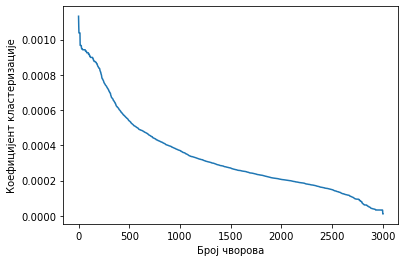

In [41]:
df.sort_values('cc', inplace=True, ascending=False)
y = df['cc'].to_list()
plt.xlabel("Број чворова")
plt.ylabel("Коефицијент кластеризације")
plt.plot(y)
plt.show()

###### Erdos-Renyi

In [42]:
n = G.number_of_nodes()
m = G.number_of_edges()
p = ( 2*float(m) ) / ( n* (n-1) )

er_network = nx.erdos_renyi_graph(n,p)

In [43]:
# Da li je klasterisanje izraženo ili ne?

print("Erdos-Renyi Average cc", nx.average_clustering(er_network, count_zeros = False))
print("Erdos-Renyi Global cc", nx.transitivity(er_network))

# A: Izrazenije nego u er mrezi: Da

Erdos-Renyi Average cc 0.012515803899298222
Erdos-Renyi Global cc 0.01251892405596871


#### Small World Network

In [44]:
### 11) Na osnovu odgovora na pitanja 8 i 10, proceniti da li mreža iskazuje osobine malog sveta.

# A small-world network is a type of mathematical graph in which most nodes are not neighbors of one another, but 
# the neighbors of any given node are likely to be neighbors of each other and most nodes can be reached 
# from every other node by a small number of hops or steps.

# A small world network is characterized by a small average shortest path length, and a large clustering coefficient
# Small-worldness is commonly measured with the coefficient sigma or omega.
# Both coefficients compare the average clustering coefficient and shortest path length of a given graph 
# against the same quantities for an equivalent random or lattice graph. (watts_strogatz_graph)

# if sigma > 1 network is small-world. 
#nx.sigma(G) # forever

# Erdos-Renyi network:
# nx.average_shortest_path_length(er_network) # result: 2.444373264140706
# Erdos-Renyi Average cc 0.012376659911008338

# ANSWER:
# (Gephi) Average Path length: 2.098559911126496
# Average clustering coefficient:  0.907

# Da. (Visok koef. klasterizacije i mala prosecna distanca)

#### Network Assortativity

In [45]:
### 12) Izvršiti asortativnu analizu po stepenu čvora i dati odgovor da li je izraženo asortativno mešanje. 
# U slučaju da je mreža usmerena, analizu izvršiti i po ulaznom i po izlaznom stepenu čvora. 
# Priložiti i vizuelizaciju. 

## asortativnost na osnovu netežinskog stepena čvora
print("Degree assortativity coefficient: ", nx.degree_assortativity_coefficient(G))
## asortativnost na osnovu težinskog stepena čvora
print("Degree assortativity coefficient (weight): ", nx.degree_assortativity_coefficient(G, weight='weight'))

# Assortativity measures the similarity of connections in the graph with respect to the node degree.
## Asortativna mreža => čvorovi sličnog stepena se vezuju međusobno

# Positive values of r indicate a correlation between nodes of similar degree, 
# while negative values indicate relationships between nodes of different degree. 
# In general, r lies between −1 and 1. 
# When r = 1, the network is said to have perfect assortative mixing patterns,
# when r = 0 the network is non-assortative,
# while at r = −1 the network is completely disassortative.

# ANSWER:
# Mreža je disasortativna.

Degree assortativity coefficient:  -0.4364568058126873
Degree assortativity coefficient (weight):  -0.032291639691037585


#### Rich Club Phenomenon

{0: 0.02469418593400819, 1: 0.03467903601059393, 2: 0.04140339976740111, 3: 0.04613359138463072, 4: 0.04924658197159589, 5: 0.053134584793566746, 6: 0.05648779462897056, 7: 0.058620629292124374, 8: 0.06075707721950496, 9: 0.06262207674042398, 10: 0.06501243963431087, 11: 0.06789870622490139, 12: 0.07020243075703, 13: 0.07260867857693638, 14: 0.07519723644979368, 15: 0.07692437257874347, 16: 0.0797373019540358, 17: 0.08198552880677039, 18: 0.0852089967754211, 19: 0.087603618071464, 20: 0.09027056247308576, 21: 0.09285844967793627, 22: 0.09546452656502746, 23: 0.0981734422811796, 24: 0.10170648225027239, 25: 0.10488681670624632, 26: 0.10787615719894816, 27: 0.10982359071820495, 28: 0.11300058811127509, 29: 0.11683127175050272, 30: 0.11978476996972001, 31: 0.12284166552862781, 32: 0.12560078972494484, 33: 0.12872378359104023, 34: 0.1307654544767947, 35: 0.13301430333873082, 36: 0.13592872038965448, 37: 0.1386115927041194, 38: 0.14223363501187147, 39: 0.1454485211378213, 40: 0.148046800245

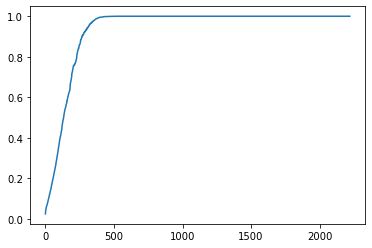

In [46]:
### 13) Da li mreža ispoljava fenomen kluba bogatih (eng. rich club phenomenon)? 

# Rich-club can be viewed as a more specific notation of assortativity, where we are only concerned with the connectivity of nodes beyond a certain richness metric.
# The rich-club coefficient is a metric on graphs and networks, designed to measure the extent to which well-connected nodes also connect to each other. 

#nx.rich_club_coefficient(G) # forever
rcc = nx.rich_club_coefficient(G, normalized=False)
print(rcc)

plt.plot(rcc.values())
plt.show()

rcc = None
# ANSWER: Ne

#### Distribution Degree 

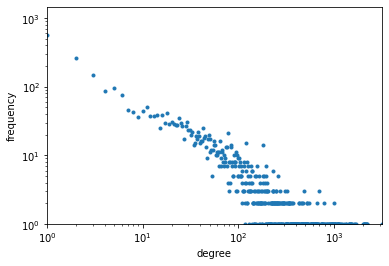

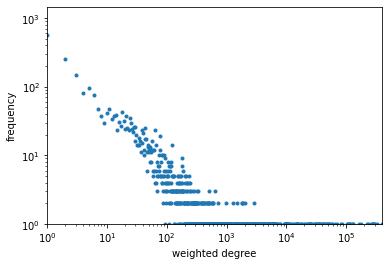

In [47]:
### 14) Kakva je distribucija čvorova po stepenu i da li prati power law raspodelu?

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    #print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()
    

plot_deg_frequency(G) # Raspodele stepena čvora
plot_deg_frequency(G, weighted = True) # Raspodela težinskog stepena čvora

Erdos-Renyi Graph:


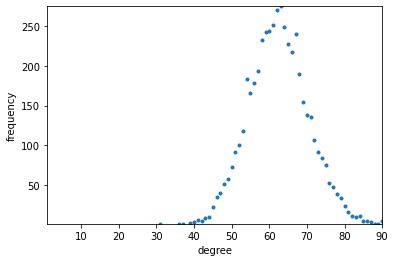

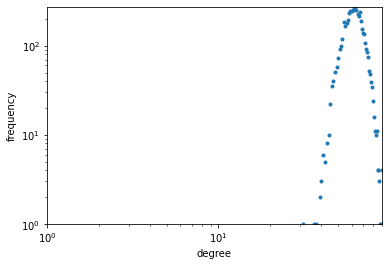

Our Graph G:


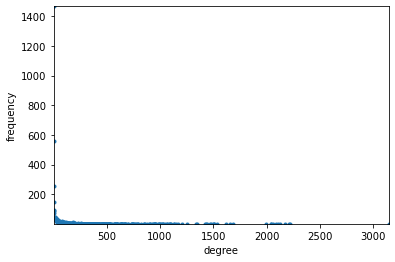

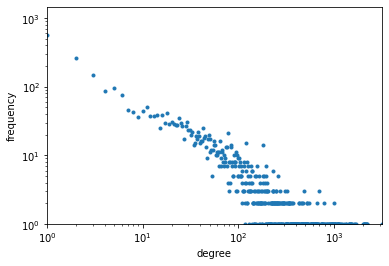

In [48]:
print("Erdos-Renyi Graph:")
plot_deg_frequency(er_network, xscale = 'linear', yscale = 'linear')
plot_deg_frequency(er_network, xscale = 'log', yscale = 'log')

print("Our Graph G:")
plot_deg_frequency(G, xscale = 'linear', yscale = 'linear')
plot_deg_frequency(G, xscale = 'log', yscale = 'log')

#### Fitting to the Power-Law Distribution

In [49]:
sum_of_weights = 0

for n in Gdom.edges.data():
    sum_of_weights += n[2]['weight']
    
print(sum_of_weights)

3683660


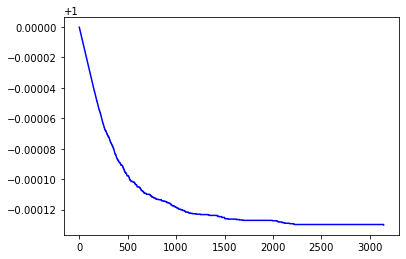

In [50]:
degree_sequence = sorted([d for n, d in Gdom.degree()], reverse=True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

max_deg = max(deg) # hoćemo po jedan bin za svaki stepen čvora

# izračunavanje histograma
values, base = np.histogram(deg, bins = max_deg)

# kumulativna suma (inkluzivna prefiksna suma)
cumulative = np.cumsum(values)

# plotovanje komplementarne kumulativne raspodele stepena čvora P(X>x)
plt.plot(base[:-1], [float(x)/sum_of_weights for x in sum_of_weights - cumulative], c='blue')

plt.show()

In [51]:
!pip install powerlaw
import powerlaw

In [52]:
results = powerlaw.Fit(degree_sequence)

print(results.supported_distributions)

Calculating best minimal value for power law fit
{'power_law': <class 'powerlaw.Power_Law'>, 'lognormal': <class 'powerlaw.Lognormal'>, 'exponential': <class 'powerlaw.Exponential'>, 'truncated_power_law': <class 'powerlaw.Truncated_Power_Law'>, 'stretched_exponential': <class 'powerlaw.Stretched_Exponential'>, 'lognormal_positive': <class 'powerlaw.Lognormal_Positive'>}


In [53]:
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('exponential', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")

2.2464827254754156
156.0
0.05602523213855549
Loglikelihood ratio: 22.597196374035335
Statistical significance: 0.07297667095794498


Assuming nested distributions


Loglikelihood ratio: -15.610393791125452
Statistical significance: 2.3028685403048144e-08
Loglikelihood ratio: -38.20759016516083
Statistical significance: 2.1843097673389458e-05


#### Hubs and authorities

In [54]:
### 15) Odrediti najvažnije habove i autoritete u mreži. 
# Kako su oni raspoređeni i ugrađeni u mrežu, da li su na periferiji ili u jezgru mreže?

# Hubs and authorities are a natural generalization of eigenvector centrality.
# A high hub actor points to many good authories and 
# a high authority actor receives from many good hubs. 

# Mreza je neusmerena -> nema habove i autoritete.

In [55]:
DiG = nx.DiGraph()

DiG.add_nodes_from([1, 2])
DiG.add_edge(1, 2)
DiG.add_edge(1, 2)
DiG.add_edge(2, 1)
DiG.edges[1, 2]['weight'] = 2;
DiG.edges[2, 1]['weight'] = 1;

nx.write_gml(DiG, "models/test.gml")

# Mere centralnosti

In [56]:
import networkx as nx

G = nx.Graph(nx.read_gml("models/our_model.gml"))

In [57]:
component_size_list = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(component_size_list)

[3525, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [58]:
largest_cc = max(nx.connected_components(G), key=len)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
Gdom = G.subgraph(largest_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} čvorova i {len(Gdom.edges())} grana")
nx.write_gml(Gdom, "models/gdom_model.gml")

Dominantna komponenta ima 3525 čvorova i 156941 grana


In [59]:
def measure_centrality(measure_name, graph):
    if measure_name == 'DC':
        cm_dict = nx.degree_centrality(graph)
    if measure_name == 'CC':
        cm_dict = nx.closeness_centrality(graph)
    if measure_name == 'BC':
        cm_dict = nx.betweenness_centrality(graph)
    if measure_name == 'EC':
        cm_dict = nx.eigenvector_centrality(graph, weight='weight')

    df_cm = pd.DataFrame.from_dict(cm_dict, orient='index', columns=[measure_name])
    df_cm = pd.DataFrame({measure_name:df_cm[measure_name]})
    df_cm.sort_values(by=measure_name, ascending=False, inplace = True)

    print(df_cm.head(10))

In [60]:
measure_centrality('DC', Gdom)
measure_centrality('CC', Gdom)
measure_centrality('BC', Gdom)
measure_centrality('EC', Gdom)

                DC
t5_6      0.892168
t5_2qh16  0.630250
t5_2cneq  0.627696
t5_2qh0u  0.616345
t5_2qh33  0.602440
t5_mouw   0.597616
t5_2qh13  0.593360
t5_2qh0f  0.584847
t5_2qh61  0.580306
t5_2fwo   0.580023
                CC
t5_6      0.901971
t5_2qh16  0.728250
t5_2cneq  0.726149
t5_2qh0u  0.720213
t5_2qh33  0.712495
t5_mouw   0.710198
t5_2qh13  0.708342
t5_2qh0f  0.703955
t5_2qh61  0.701433
t5_2fwo   0.700875
                BC
t5_6      0.368649
t5_2qh16  0.049345
t5_2fwo   0.043684
t5_2cneq  0.043102
t5_2qgzg  0.041273
t5_2qh0f  0.037738
t5_2qh0u  0.037659
t5_2qh13  0.033641
t5_2qh33  0.032297
t5_mouw   0.031969
                EC
t5_6      0.374684
t5_2cneq  0.312669
t5_2qh0u  0.291857
t5_2qh33  0.279569
t5_mouw   0.273050
t5_2qh16  0.263952
t5_2qh13  0.258876
t5_2qh61  0.257432
t5_2qh0f  0.247071
t5_2fwo   0.220668


In [61]:
degrees = sorted(Gdom.degree(weight='weight'), key=lambda x:x[1], reverse = True)
df_degree = pd.DataFrame.from_dict(dict(degrees), orient='index', columns=['degree'])
print(df_degree.head(10))

          degree
t5_6      393802
t5_2cneq  322330
t5_2qh0u  305745
t5_2qh33  292942
t5_mouw   288340
t5_2qh16  277894
t5_2qh61  272238
t5_2qh13  270770
t5_2qh0f  259155
t5_2fwo   230749


In [62]:
lambda_max =  max(nx.adjacency_spectrum(Gdom))
print(lambda_max)
print(1/lambda_max)

(183421.41895347144+0j)
(5.451925983920506e-06+0j)


In [63]:
alpha_values = [0.000005, 0.000004, 0.000003, 0.000002, 0.000001]

for a in alpha_values:
    KC_dict = nx.katz_centrality(Gdom, alpha=a, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
    df_katzc = pd.DataFrame.from_dict(KC_dict, orient='index', columns=['KC'])
    df_katzc.sort_values(by='KC', ascending=False, inplace = True)
    print(df_katzc.head(10))

                KC
t5_6      0.274325
t5_2cneq  0.230428
t5_2qh0u  0.216072
t5_2qh33  0.207436
t5_mouw   0.202965
t5_2qh16  0.196517
t5_2qh13  0.192849
t5_2qh61  0.192007
t5_2qh0f  0.184599
t5_2fwo   0.165974
                KC
t5_6      0.111426
t5_2cneq  0.095260
t5_2qh0u  0.090282
t5_2qh33  0.087154
t5_mouw   0.085626
t5_2qh16  0.083247
t5_2qh13  0.081838
t5_2qh61  0.081670
t5_2qh0f  0.078885
t5_2fwo   0.072089
                KC
t5_6      0.060535
t5_2cneq  0.052969
t5_2qh0u  0.050783
t5_2qh33  0.049345
t5_mouw   0.048686
t5_2qh16  0.047573
t5_2qh13  0.046887
t5_2qh61  0.046872
t5_2qh0f  0.045545
t5_2fwo   0.042399
                KC
t5_6      0.037699
t5_2cneq  0.034030
t5_2qh0u  0.033040
t5_2qh33  0.032355
t5_mouw   0.032063
t5_2qh16  0.031524
t5_2qh61  0.031201
t5_2qh13  0.031179
t5_2qh0f  0.030547
t5_2fwo   0.029041
                KC
t5_6      0.024935
t5_2cneq  0.023486
t5_2qh0u  0.023123
t5_2qh33  0.022858
t5_mouw   0.022753
t5_2qh16  0.022541
t5_2qh61  0.022420
t5_2qh13  0.

In [64]:
nodes_list = list(Gdom.nodes)
beta_values = [1] * len(nodes_list)

vip_subreddit = unique_subreddits[unique_subreddits['subreddit'] == 'reddit.com']
vip_index = nodes_list.index(vip_subreddit['subreddit_id'].item())
beta_values[vip_index] = 10

beta_dict = dict(zip(nodes_list, beta_values))

for a in alpha_values:
    KC_dict = nx.katz_centrality(Gdom, alpha=a, beta=beta_dict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
    df_katzc = pd.DataFrame.from_dict(KC_dict, orient='index', columns=['KC'])
    df_katzc.sort_values(by='KC', ascending=False, inplace = True)
    print(df_katzc.head(10))

                KC
t5_6      0.374052
t5_2cneq  0.262997
t5_2qh0u  0.245159
t5_2qh33  0.235036
t5_mouw   0.229735
t5_2qh16  0.222666
t5_2qh13  0.218098
t5_2qh61  0.216845
t5_2qh0f  0.208969
t5_2fwo   0.187175
                KC
t5_6      0.271547
t5_2cneq  0.133354
t5_2qh0u  0.124117
t5_2qh33  0.119297
t5_mouw   0.116842
t5_2qh16  0.113930
t5_2qh13  0.111350
t5_2qh61  0.110682
t5_2qh0f  0.107631
t5_2fwo   0.097215
                KC
t5_6      0.215890
t5_2cneq  0.074746
t5_2qh0u  0.069679
t5_2qh33  0.067239
t5_mouw   0.066027
t5_2qh16  0.064785
t5_2qh13  0.063274
t5_2qh61  0.062897
t5_2qh0f  0.061708
t5_2qgzg  0.056561
                KC
t5_6      0.188717
t5_2cneq  0.045537
t5_2qh0u  0.042762
t5_2qh33  0.041523
t5_mouw   0.040923
t5_2qh16  0.040411
t5_2qh13  0.039541
t5_2qh61  0.039329
t5_2qh0f  0.038907
t5_2qgzg  0.036403
                KC
t5_6      0.174179
t5_2cneq  0.028214
t5_2qh0u  0.026992
t5_2qh33  0.026484
t5_mouw   0.026243
t5_2qh16  0.026083
t5_2qh13  0.025684
t5_2qh61  0.

# Komune

In [ ]:
!pip install sklearn
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

In [ ]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.show() 

In [ ]:
L_dom = nx.laplacian_matrix(Gdom).toarray()

eigenvalues = linalg.eigvals(L_dom) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:60]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana dominantne komponente')

df_eig_30 = df_eig[:30]
plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana dom. komponente')

In [ ]:
points_of_interest = [2, 3, 5, 8, 12, 14, 17]

for k in points_of_interest:
    
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(Gdom))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, Gdom.nodes()):
        G.add_node(label, color=c)

    for edge in Gdom.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    # nx.write_pajek(G, "etf/spectral3.net")
    nx.write_gml(G, f"models/spectral{k}.gml")
    
    csizes = np.zeros(shape=k, dtype=int)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes}")

In [ ]:
k = 2
Gcom = nx.Graph(nx.read_gml(f"models/spectral{k}.gml"))

In [ ]:
com_ids = [None] * k

for i in range(k):
    com_ids[i] = []

for n, prop in Gcom.nodes(data=True):
    com_ids[int(prop['color'])].append(n)
    
for l in com_ids:
    print("\n")
    print(l)

In [ ]:
color_subred = unique_subreddits[unique_subreddits['subreddit_id'].isin(com_ids[1])]
print(color_subred)

In [ ]:
DiG = nx.DiGraph()

DiG.add_nodes_from([1, 2])
DiG.add_edge(1, 2)
DiG.add_edge(1, 2)
DiG.add_edge(2, 1)
DiG.edges[1, 2]['weight'] = 2;

nx.write_gml(DiG, "models/test.gml")